In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## First: we loead the dataset (always run this one first and then jump down to 2 DIRECTLY)

In [51]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
#display(CMU_movie_metadata.head(10))

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

## 0: Here's Emma playground, go to section 1 for serious stuff

In [39]:
#display(CMU_movie_metadata)
display(CMU_plot_summary)

display(CMU_plot_summary['plot_summary'][34])
print(CMU_plot_summary['wikipedia_movie_ID'][34])

,wikipedia_movie_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


'In 1942, a 10 year old boy named Timmy plays with a jigsaw puzzle of a nude woman when his mother walks in. She chastises him for it. The mother orders Timmy to get a plastic bag because "I\'m gonna burn everything." Timmy gruesomely murders her with an axe instead of getting the plastic bag. The police later arrive at the house and Timmy is finishing the puzzle. The police break into the house through the front door. Timmy then hides in one of the closets. The police then enter into the bedroom, they find a bloody mess all over the room and also find the mother\'s head inside one of the closets. The police hear Timmy weeping in the another closet, so they open the door and find him covered in blood. The police question the whereabouts of the father; the nanny replies hesitantly and lying obviously that he is in Europe with the Air Force, but the nanny also says that Timmy has an aunt, who lives an hour away and also the nanny says that she will call Timmy\'s aunt and that the nanny w

8471210


In [6]:
#type(CMU_plot_summary['plot_summary'][34]) to find out the type, Emma
my_string = CMU_plot_summary['plot_summary'][34]

my_string = CMU_plot_summary['plot_summary'][0]
print(my_string)
my_string.count("bizarre")

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


1

In [40]:
# ici c'est juste un test, pour voir si ça marche. voir prochaine cellule pour du sérieux
violent_words_list = ["acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", "annihilate", "nude"]

CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(violent_words_list[10]))

0        0
1        0
2        0
3        0
4        0
        ..
42298    0
42299    0
42300    0
42301    0
42302    0
Name: plot_summary, Length: 42303, dtype: int64

In [4]:
# voilà, ici c'est du sérieux
findings = pd.DataFrame()

violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


for word in violent_words_list:
    findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

display(findings)

/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: Perfo

KeyboardInterrupt: 

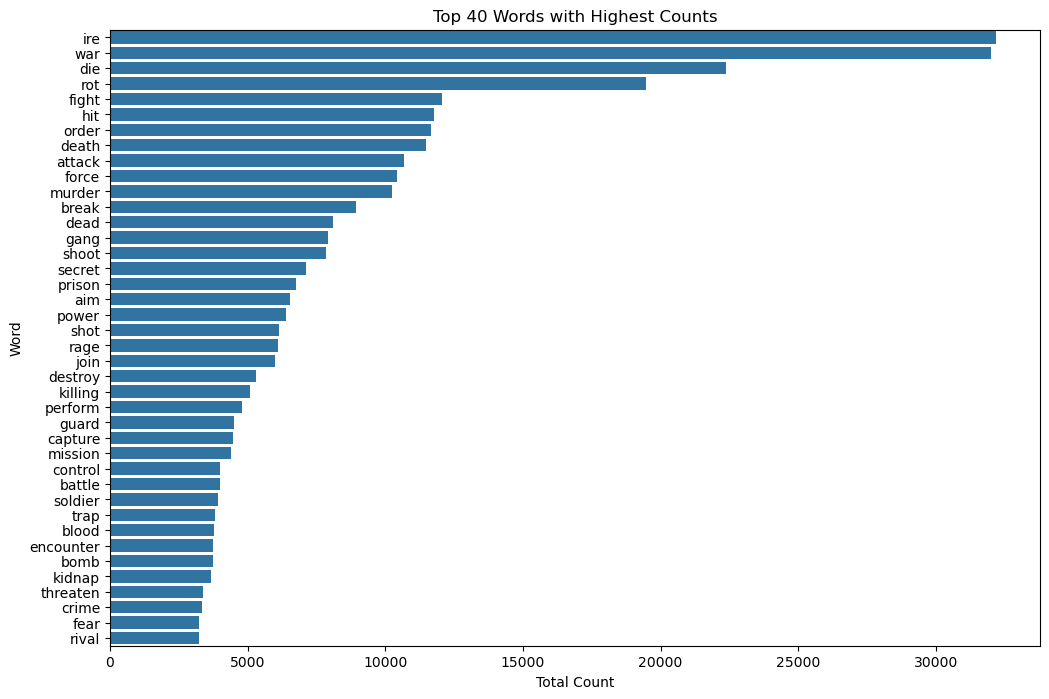

In [8]:
# Sum the word counts across all rows for each word
word_counts_per_column = findings.sum(axis=0)

# Sort the word counts in descending order and select the top N words
top_n_words = 40
top_words = word_counts_per_column.sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

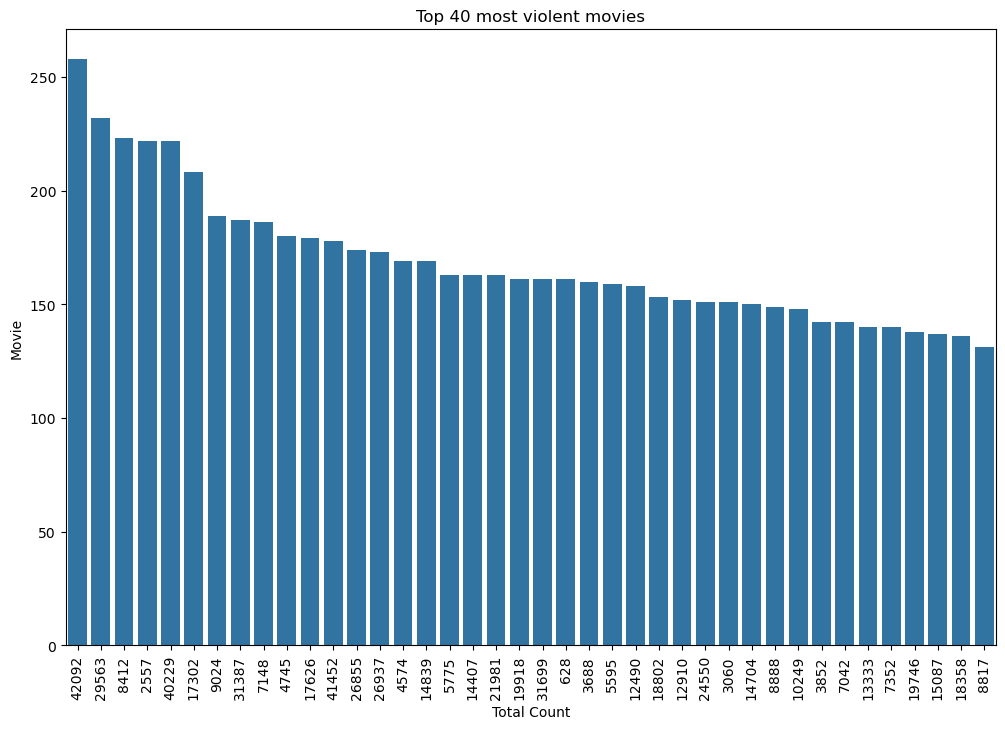

In [9]:
# Most violent movies

word_counts_per_movie = findings.sum(axis=1)

# Sort the word counts in descending order and select the top N movies (most violent)
top_n_movies = 40
top_movies = word_counts_per_movie.sort_values(ascending=False).head(top_n_words)

order = top_movies.index

# vu qu'il ne veut pas collaborer
top_movies = top_movies.reset_index()
top_movies.columns = ['movie id', 'violent words (all) count']

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='movie id', y='violent words (all) count', data=top_movies, order=order)
plt.title(f"Top {top_n_words} most violent movies")
plt.xlabel("Total Count")
plt.ylabel("Movie")
plt.xticks(rotation=90)
plt.show()

## 1: Essayons de faire ça un peu propre

In [6]:
violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


In [7]:
#for word in violent_words_list:
#    CMU_plot_summary[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

# add the title column for later
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name']], on='wikipedia_movie_ID', how='left')
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_genres']], on='wikipedia_movie_ID', how='left')

word_counts = {word: CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word)/len(x.split())) for word in violent_words_list}
word_counts_df = pd.DataFrame(word_counts)
CMU_plot_summary = pd.concat([CMU_plot_summary, word_counts_df], axis=1)

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,worldwide,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",0.0,0.0,0.0,0.002571,0.0,0.001285,...,0.0,0.002571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",0.0,0.0,0.0,0.006048,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
word_columns = CMU_plot_summary.columns.difference(['wikipedia_movie_ID', 'plot_summary', 'movie_name', 'total_violent_words', 'movie_genres'])

# Sum across columns (per movie) to get the total appearances of all words in each summary
CMU_plot_summary['total_violent_words'] = CMU_plot_summary[word_columns].sum(axis=1)

#  Sum across rows (per word) to get the total appearances of each word across all summaries
first_conclusions = pd.DataFrame()
first_conclusions['total_movies_appearances'] = CMU_plot_summary[word_columns].sum(axis=0)

In [13]:
display(CMU_plot_summary)
display(first_conclusions)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",0.0,0.0,0.0,0.002571,0.0,0.001285,...,0.002571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061697
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",0.0,0.0,0.0,0.006048,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064516
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031802
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025000
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051527
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012500
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017391


,total_movies_appearances
acid,0.667865
aggressor,0.040393
agitator,0.047649
aim,18.575383
alert,1.407238
...,...
yelling,0.286552
zeal,1.020969
zealot,0.073353
zigzag,0.020643


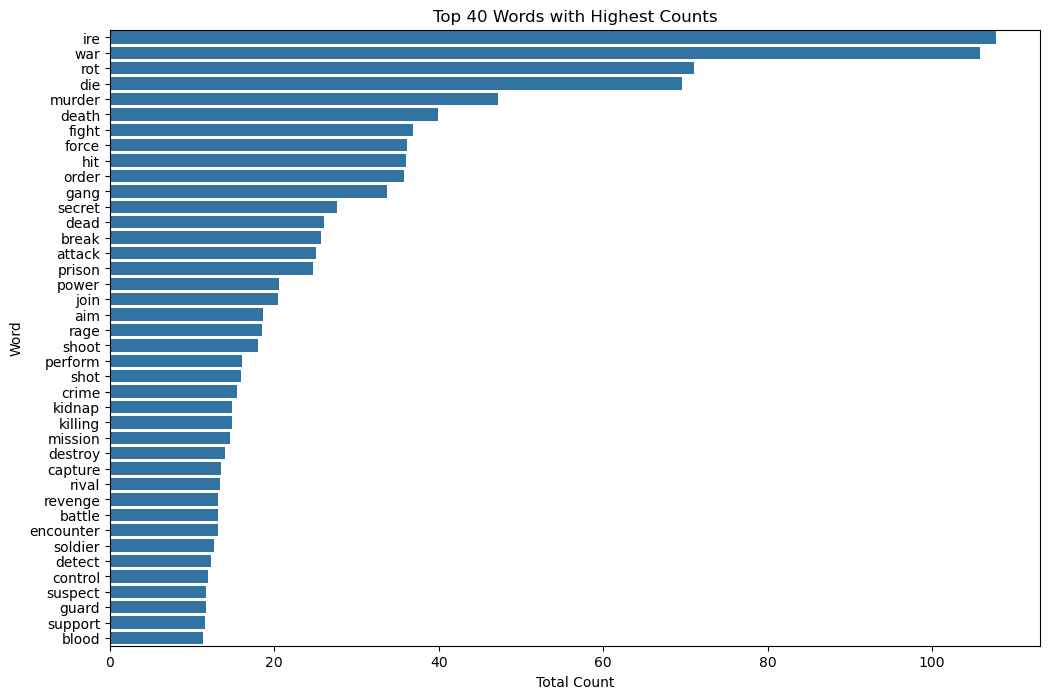

In [14]:
top_n_words = 40
top_words = first_conclusions['total_movies_appearances'].sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
12813,34188375,Former mercenary kidnapping expert hired by a ...,Six Bullets,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
6334,23923922,"Two men join forces to build a cattle empire, ...",American Empire,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352941
10802,25011263,"During the Korean War, a group of American sol...",The Hook,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343750
869,14399659,A top secret American forces strategic bomber ...,Midnight Eagle,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
6140,31304298,"During the First World War, Russian forces att...",13 Men and a Gun,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312500
14812,15502188,"Liberty Horton, an American heiress, is kidnap...",Liberty,"{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294118
25762,33473147,Three Korean soldiers are faced with a dark pa...,The Showdown,"{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778
28305,28749199,A Heiress's life threatened by stalker after h...,Adayalam,"{""/m/02n4kr"": ""Mystery""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727
12333,12494928,The movie about a female detective who is forc...,Stripped to Kill,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727
30191,22799564,The film follows a hot summer day in the life ...,Ordinary People,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270270


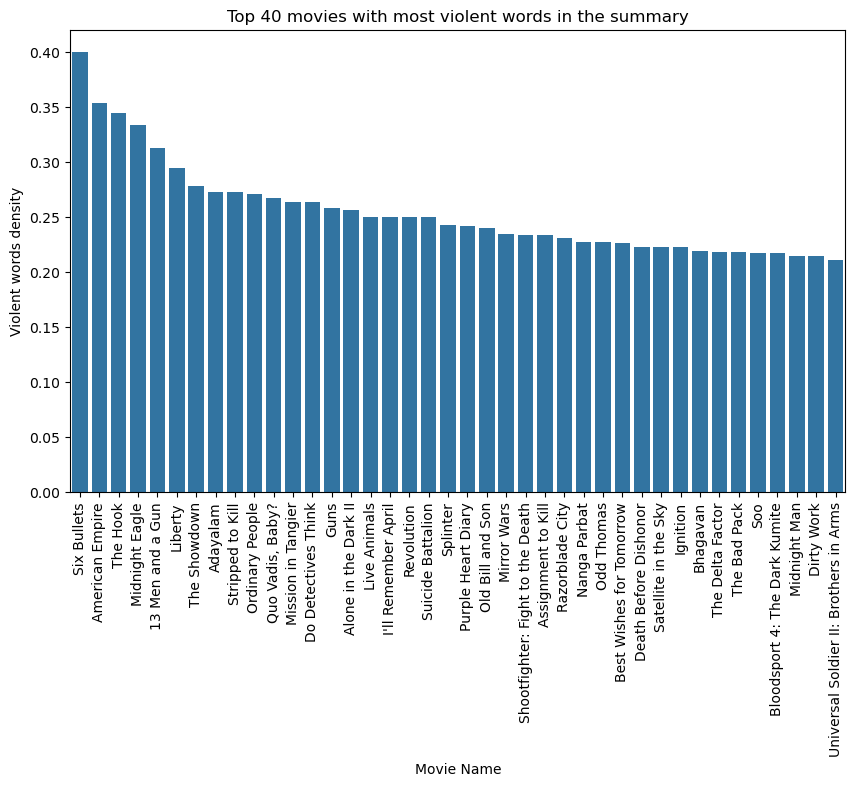

In [19]:

CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=False)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(40)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
12813,34188375,Former mercenary kidnapping expert hired by a ...,Six Bullets,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
6334,23923922,"Two men join forces to build a cattle empire, ...",American Empire,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352941
10802,25011263,"During the Korean War, a group of American sol...",The Hook,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343750
869,14399659,A top secret American forces strategic bomber ...,Midnight Eagle,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
6140,31304298,"During the First World War, Russian forces att...",13 Men and a Gun,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40094,33486340,Dad Made Dirty Movies chronicles Stephen C. Ap...,"\\""Dad Made Dirty Movies\\""","{""/m/0jtdp"": ""Documentary""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
6787,31748184,This knockabout English comedy is a spoof on t...,The Vampires of Bloody Island,"{""/m/05p553"": ""Comedy film"", ""/m/03npn"": ""Horr...",0.0,0.0,0.0,0.007752,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
2385,105394,"The film, a tongue-in-cheek satire of typical ...",Girlfriend From Hell,"{""/m/01hmnh"": ""Fantasy"", ""/m/03npn"": ""Horror"",...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
10052,7185465,Guns and Talks follows a team of four skilled ...,Guns & Talks,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/03q4nz"": ""Wo...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279


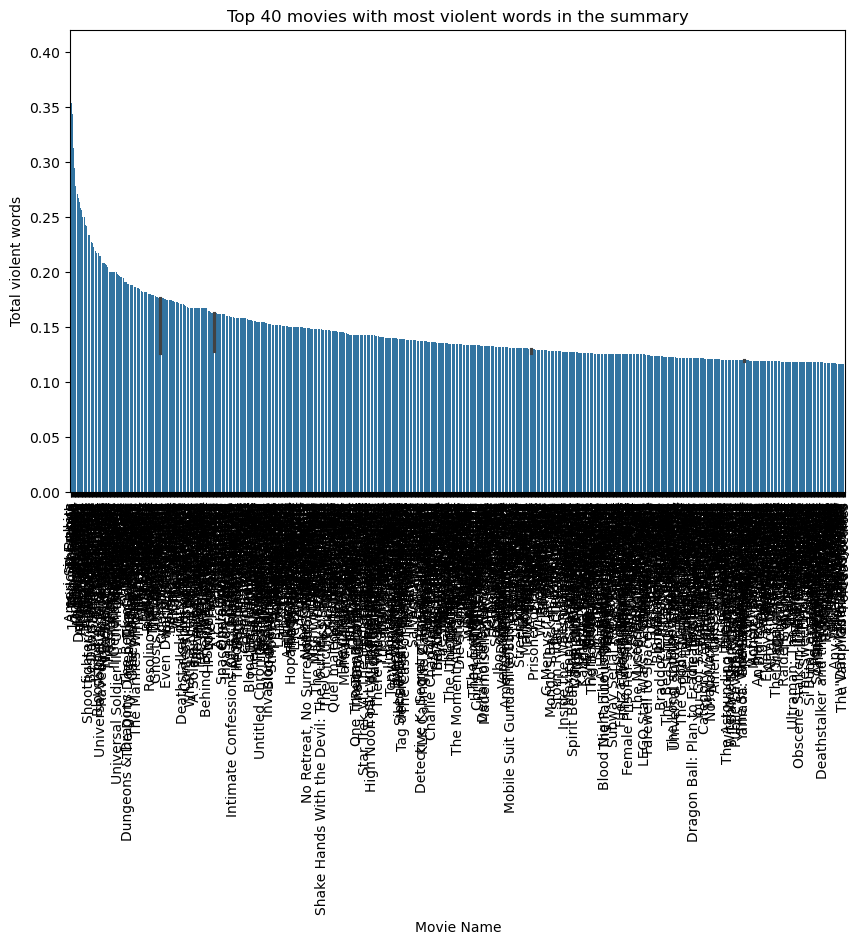

In [17]:

CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=False)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(1000)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Total violent words")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
9416,28164962,<ref namehttp://www2u.biglobe.ne.jp/~p-g/data/...,Three Naked Sisters: Lewdness,"{""/m/0gw5n2f"": ""Japanese Movies""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3902,34985175,This tale depicts the relationship between the...,HM HM,"{""/m/02hmvc"": ""Short Film"", ""/m/0hcr"": ""Animat...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18552,28178332,A head waiter in a country hotel works various...,Small Hotel,"{""/m/05p553"": ""Comedy film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27026,1802864,"The film is centered on Spencer , who moves to...",According to Spencer,"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39042,33175534,"Set in the year 1980, the Enterprise explores ...",Steam Trek: The Moving Picture,"{""/m/02hmvc"": ""Short Film"", ""/m/068twy"": ""Fan ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14705,36353254,The movie revolves around four young men who a...,The Reunion,"{""/m/05p553"": ""Comedy film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211,22781881,The film follows the formative years of Vladi...,A Mother's Heart,{},0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36431,4837697,Koi Tujh Sa Kahan revolves around a loving hus...,Koi Tujh Sa Kahan,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7221,34952810,Fatma is old and lame. She has worked all her ...,Fatma,"{""/m/02hmvc"": ""Short Film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


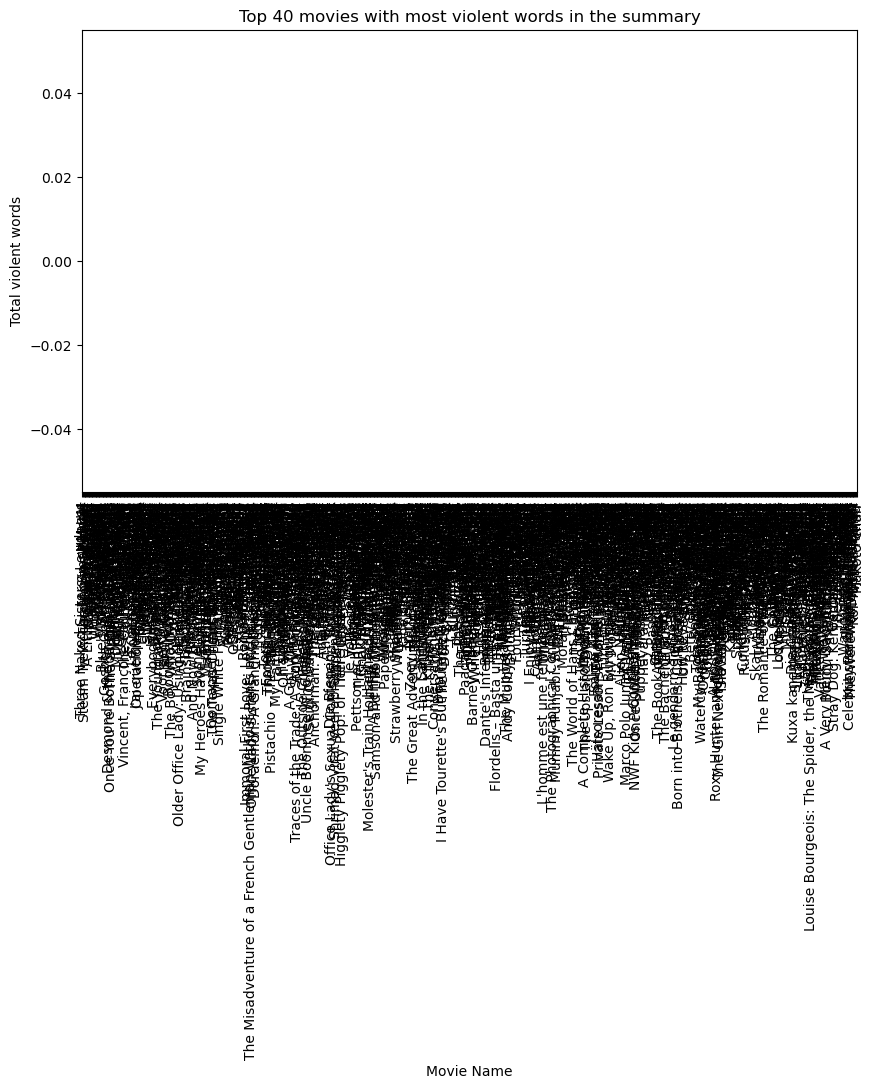

In [18]:
CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=True)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(1000)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Total violent words")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

## 2: New investigation: let's look at psychological violence

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

In [73]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
#display(CMU_movie_metadata.head(10))

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

In [74]:
# Add the movie titles and the genres
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name', 'movie_genres']], on='wikipedia_movie_ID', how='left')

# Lower case the plot_summaries
CMU_plot_summary['plot_summary'] = CMU_plot_summary['plot_summary'].str.lower()

In [75]:
# First, to avoid errors, we remove the NAN, so that we can then apply extract_genres to all CMU_movies_sprted_psycho
CMU_plot_summary['movie_genres'] = CMU_plot_summary['movie_genres'].fillna('')

def extract_genres(text):
    # Find all matches for genre names using a regex pattern that matches quoted text after colon
    return ', '.join(re.findall(r'": "([^"]+)"', text))

# Apply to the whole 'movie_genres' column
CMU_plot_summary['movie_genres'] = CMU_plot_summary['movie_genres'].apply(extract_genres)

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres
0,23890098,"shlykov, a hard-...",Taxi Blues,"Drama, World cinema"
1,31186339,the nation of pa...,The Hunger Games,Action/Adventure...
2,20663735,poovalli inducho...,Narasimham,"Musical, Action,..."
3,2231378,the lemon drop k...,The Lemon Drop Kid,Screwball comedy...
4,595909,seventh-day adve...,A Cry in the Dark,"Crime Fiction, D..."
...,...,...,...,...
42298,34808485,the story is abo...,Oomakkuyil Padumbol,Children's
42299,1096473,in 1928 hollywoo...,The Last Command,"Silent film, Ind..."
42300,35102018,american luthier...,Randy Parsons: A...,"Short Film, Musi..."
42301,8628195,abdur rehman kha...,Kabuliwala,Drama


In [76]:
psycho_violence_list = [
    "abandon",
    "abandoned",
    "abandoning",
    "abandonment",
    "abuse",
    "abused",
    "abusing",
    "abusive",
    "agitate",
    "agitated",
    "agitating",
    "agony",
    "alienate",
    "alienated",
    "alienating",
    "amnesia",
    "anger",
    "angry",
    "anguish",
    "animalistic",
    "antagonise",
    "antagonize",
    "attack",
    "attacked",
    "attacking",
    "anxious",
    "avoid",
    "avoided",
    "avoiding",
    "backhanded",
    "belittle",
    "belittled",
    "belittling",
    "betray",
    "betrayal",
    "betrayed",
    "betraying",
    "blackmail",
    "blackmailed",
    "blackmailing",
    "blame",
    "blamed",
    "blame-shifting",
    "blaming",
    "brainwash",
    "brainwashed",
    "brainwashing",
    "break",
    "breaking",
    "broken",
    "bully",
    "bullied",
    "bullying",
    "catastrophise",
    "catastrophize",
    "catastrophising",
    "catastrophizing",
    "chaos",
    "condescending",
    "condescendent",
    "condition",
    "conditional",
    "control",
    "controlled",
    "controlling",
    "criticism",
    "criticise",
    "criticize",
    "criticised",
    "criticized",
    "criticising",
    "criticizing",
    "cruel",
    "cruelty",
    "damaging",
    "deceive",
    "deceit",
    "deceptive",
    "defame",
    "demean",
    "demeaned",
    "demeaning",
    "delude",
    "deluded",
    "deluding",
    "delusion",
    "delusional",
    "demoralize",
    "deny",
    "denial",
    "denied",
    "denying",
    "dependency",
    "depressed",
    "depression",
    "despair",
    "destructive",
    "discredit",
    "discredited",
    "discrediting",
    "dishonest",
    "dismiss",
    "dismissal",
    "dismissed",
    "dismissing",
    "dismissive",
    "disillusioned",
    "disorder",
    "disregard",
    "distress",
    "dominate",
    "dominated",
    "dominating",
    "domination",
    "downgrade",
    "downgraded", 
    "downgrading",
    "dread",
    "embarrass",
    "embarrassed",
    "embarrassing",
    "embarrassment",
    "entitle",
    "entitled",
    "entitlement",
    "exclude",
    "excluded",
    "excluding",
    "exclusion",
    "exploit",
    "exploited",
    "exploitation",
    "exploitative",
    "extortion",
    "fabricated",
    "fear",
    "fearing",
    "fearful",
    "fear-monger",
    "fear-mongered",
    "fear-mongering",
    "frighten",
    "frightened",
    "frightening",
    "gaslight",
    "gaslighted",
    "gaslighting",
    "gaslit",
    "guilt-trip",
    "guilt-tripped",
    "guilt-tripping",
    "guilty",
    "hallucinate",
    "hallucinated",
    "hallucinating",
    "hallucination",
    "harass",
    "harassed",
    "harassing",
    "harassment",
    "helplessness",
    "hoover",
    "hoovered",
    "hoovering",
    "hopelessness",
    "hostile",
    "hostility",
    "humiliate",
    "humiliated",
    "humiliating",
    "humiliation",
    "hurt",
    "hurting",
    "hypercriticise",
    "hypercriticize",
    "hypercriticised",
    "hypercriticized",
    "hypercriticising",
    "hypercriticizing",
    "ignore",
    "ignored",
    "ignoring",
    "illicit",
    "ill-treated",
    "ill-treatment",
    "illude",
    "illusion",
    "implode",
    "implosion",
    "inferior",
    "inferiority",
    "insane",
    "insanity",
    "insult",
    "insulted",
    "insulting",
    "intimidate",
    "intimidated",
    "intimidating",
    "intimidation",
    "invalidate",
    "invalidated",
    "invalidating",
    "invalidation",
    "isolate",
    "isolated",
    "isolating",
    "isolation",
    "jealous",
    "jealousy",
    "judgmental",
    "lie",
    "lied",
    "lying",
    "love-bomb",
    "love-bombed",
    "love-bombing",
    "mad",
    "madden",
    "maddened",
    "maddening",
    "madness",
    "manipulate",
    "manipulated",
    "manipulating",
    "manipulation",
    "manipulative",
    "mentally",
    "minimise",
    "minimize",
    "minimised",
    "minimized",
    "minimising",
    "minimizing",
    "mock",
    "mocked",
    "mockery",
    "mocking",
    "name-call",
    "name-called",
    "name-calling",
    "narcissism",
    "narcissist",
    "narcissistic",
    "neglect",
    "neglected",
    "neglecting",
    "normalise",
    "normalize",
    "normalised",
    "normalized",
    "normalising",
    "normalizing",
    "numb",
    "obsess", 
    "obsession",
    "obsessive",
    "oppressive",
    "oppression",
    "overprotect",
    "overprotected",
    "overprotecting",
    "overprotective",
    "outburst",
    "pain",
    "painfull",
    "paralised",
    "paralyzed",
    "paranoia",
    "passive-agressive",
    "patronise",
    "patronize",
    "patronised",
    "patronized",
    "patronising",
    "patronizing",
    "perverse",
    "possess",
    "possessed",
    "possessing",
    "possessive",
    "possessiveness",
    "power",
    "pretend",
    "project",
    "projected",
    "projecting",
    "projection",
    "psycho",
    "psychological",
    "psychopath",
    "psychology",
    "rage",
    "reject",
    "rejected",
    "rejecting",
    "rejection",
    "repress",
    "repressed",
    "repressing",
    "repression",
    "ridicule",
    "ridiculed",
    "ridiculing",
    "sabotage",
    "sabotaged",
    "sabotaging",
    "sad",
    "sadden",
    "saddened",
    "saddening",
    "sadness",
    "sarcasm",
    "scapegoat",
    "scapegoated",
    "scapegoating",
    "scared",
    "scaring",
    "scorn",
    "scorned",
    "scorning",
    "self-centered",
    "shame",
    "shamed",
    "shaming",
    "shatter",
    "shout",
    "shouted",
    "shouting",
    "sleep-deprived",
    "slander",
    "slandered",
    "slandering",
    "smear",
    "smeared",
    "smearing",
    "smother",
    "smothered",
    "smothering",
    "sneer",
    "sneered",
    "sneering",
    "stonewall",
    "stonewalled",
    "stonewalling",
    "stalk",
    "stalked",
    "stalking",
    "suicide",
    "suppress",
    "suppressed",
    "suppressing",
    "tactic",
    "threat",
    "threaten",
    "threatened",
    "threatening",
    "threats",
    "torment",
    "tormented",
    "tormenting",
    "trauma",
    "traumatise",
    "traumatize",
    "traumatised",
    "traumatized",
    "traumatising",
    "traumatizing",
    "triangulate",
    "triangulated",
    "triangulating",
    "two-faced",
    "ultimatum",
    "ultimatums",
    "unappreciated",
    "undermine",
    "undermined",
    "undermining",
    "undervalued",
    "undervaluation",
    "unhealthy",
    "unpredictable",
    "unstable",
    "untrustworthiness",
    "untrustworthy",
    "unworthy",
    "vengeful",
    "verbal abuse",
    "victim-blame",
    "victim-blamed",
    "victim-blaming",
    "vindictive",
    "vulnerable",
    "weaponise",
    "weaponize",
    "weaponised",
    "weaponized",
    "weaponising",
    "weaponizing",
    "withhold",
    "withheld",
    "withholding",
    "word salad",
    "yell",
    "yelled",
    "yelling"
]

#print(len(psycho_violence_list))

In [77]:
def find_all_occurences(type_violence_list, CMU_plot_summary):
    # Reshape the list
    pattern_psycho = r'\b(?:' + '|'.join(type_violence_list) + r')\b'
    # Calculate the appearances
    CMU_plot_summary['total_psycho_vio_words'] = CMU_plot_summary['plot_summary'].str.findall(pattern_psycho).str.len()

find_all_occurences(psycho_violence_list, CMU_plot_summary)

# Count the number of words in the summary
CMU_plot_summary['n_words_summary'] = CMU_plot_summary['plot_summary'].str.split().str.len()

# Calculate the "violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_plot_summary['total_psycho_vio_words_density'] = CMU_plot_summary['total_psycho_vio_words'] / CMU_plot_summary['n_words_summary']

In [78]:
# Sort the movies according to their violent words
CMU_movies_sorted_psycho_words = CMU_plot_summary.sort_values(by='total_psycho_vio_words', ascending=False)
display(CMU_movies_sorted_psycho_words)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,total_psycho_vio_words,n_words_summary,total_psycho_vio_words_density
15583,30201005,the film opens w...,J. Edgar,"LGBT, Biographic...",46,963,0.047767
17302,10619079,episode 1: a new...,Genocyber,Animation,44,3793,0.011600
3060,21768047,{{plot}} fuyuki ...,Keroro Gunso the...,Japanese Movies,33,3144,0.010496
2557,11103867,the story begin...,Dragon Head,"Science Fiction,...",31,3382,0.009166
34837,14573581,"{{plot|date""barb...",Yogi Bear and th...,"Family Film, Ani...",31,2172,0.014273
...,...,...,...,...,...,...,...
22811,8595798,chi tien-wei has...,The Face Behind ...,Action/Adventure...,0,73,0.000000
22810,8508987,the film is an a...,Little Longnose,"Family Film, Ani...",0,100,0.000000
3696,24479155,lady gwendolyn ...,The Sporting Venus,"Silent film, Rom...",0,21,0.000000
22802,4650594,a young man ente...,L'Argent,"Crime Fiction, D...",0,305,0.000000


In [84]:
# Sort the movies according to their violent words density in the plot summary
CMU_movies_sorted_psycho_density = CMU_plot_summary.sort_values(by='total_psycho_vio_words_density', ascending=False)
display(CMU_movies_sorted_psycho_density)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,total_psycho_vio_words,n_words_summary,total_psycho_vio_words_density
10427,9612611,"mysterious pilot, the eagle, attempts to sabotage a local company and sends threatening messages via skywriting.",The Shadow of the Eagle,"Crime Fiction, Adventure, Detective, Black-and-white, Action/Adventure, Western, Action",2,16,0.125000
28359,28807164,the daughters of a domineering mother aspire to break free of her control and form romantic attachments.,Deadly Advice,"Drama, Comedy",2,17,0.117647
36592,19286405,"panakkara kudumbam is a movie about how human beings disregard everything, including love and relations for money and power.",Panakkara Kudumbam,Drama,2,19,0.105263
19549,34596327,a journalist who covered the vietnam war becomes mentally unstable and goes on a spree of robbery and murder.,The Beast to Die,"Crime Fiction, Action, Drama",2,19,0.105263
15190,26477451,a look at the life and work of physician-assisted suicide advocate jack kevorkian. jack introduces a new idea of doctor assisted suicide. his aim is to help the hopeless patients who are suffering pain to commit suicide effortlessly.{{cite news}},You Don't Know Jack,"Courtroom Drama, Biography, Drama, Biopic [feature], Television movie",4,39,0.102564
...,...,...,...,...,...,...,...
25241,2866433,"daffy goes to the beach with his girlfriend melissa , and wants to take her picture. while posing she sees a muscle-bound duck and turns her attention toward him. daffy tries to win back his girl and takes some muscle tonic which he thinks has made him as strong as the muscle-bound duck. daffy repeatedly falls short in his attempts to demonstrate his strength, but through a fluke manages to get rid of his rival in the end.",Muscle Tussle,"Short Film, Comedy film, Animation",0,78,0.000000
25238,32832973,"the story unfolds in its original late 19th century tsarist russia high-society setting and powerfully explores the capacity for love that surges through the human heart, from the passion between adulterers to the bond between a mother and her children. as anna karenina questions her happiness, change comes to her family, friends, and community.",Anna Karenina,Drama,0,54,0.000000
25237,11698878,"detective ulisse moretti is investigating a series of murders in turin in 1983 known as the dwarf murders. the main suspect, a giallo novelist named vincenzo de fabritiis, turns up dead and the case is considered closed. however, seventeen years later, a similar series of murders begin and draw the since-retired moretti back into the case. moretti teams up with giacomo , whose mother was murdered in the 1983 spree, to determine if de fabritiis is still alive or was actually innocent of the crimes for which he was accused. as the murders continue, the investigating duo discovers that the murderer is arranging their murder to an old nursery rhyme about the killing of animals.",Sleepless,"Thriller, Giallo, Horror, Psychological thriller, Slasher",0,115,0.000000
25236,3921966,"a small boy fantasizes about catching an airplane he sees reflected in the water. one day he finally does catch the plane, and discovers that not everything is meant to be caught. *director: carlos salces *producer: blanca montoya *writers: carlos salces/blanca montoya *cinematography: chuy chávez *distributor: fantasmas films/imcine *10 minutes",En el espejo del cielo,"Short Film, Fantasy",0,50,0.000000


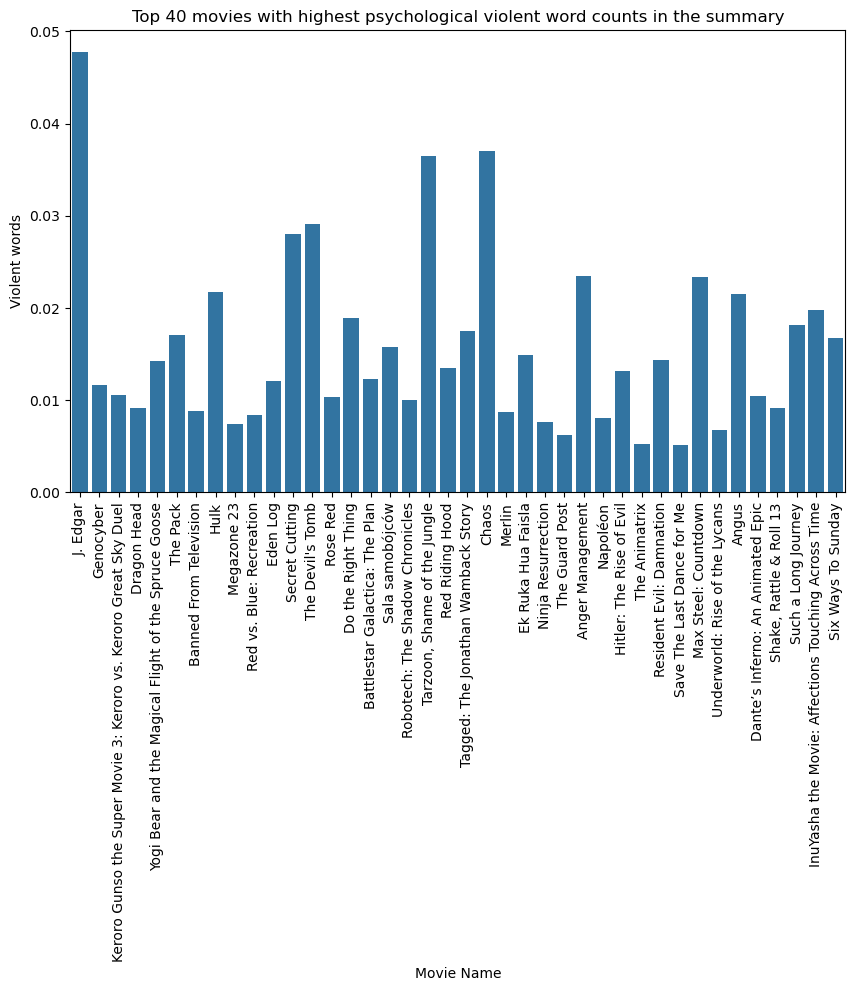

In [85]:
# Plot the results

top_movies_by_words = CMU_movies_sorted_psycho_words.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_by_words['movie_name'], y=top_movies_by_words['total_psycho_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words")
plt.title("Top 40 movies with highest psychological violent word counts in the summary")
plt.xticks(rotation=90)
plt.show()

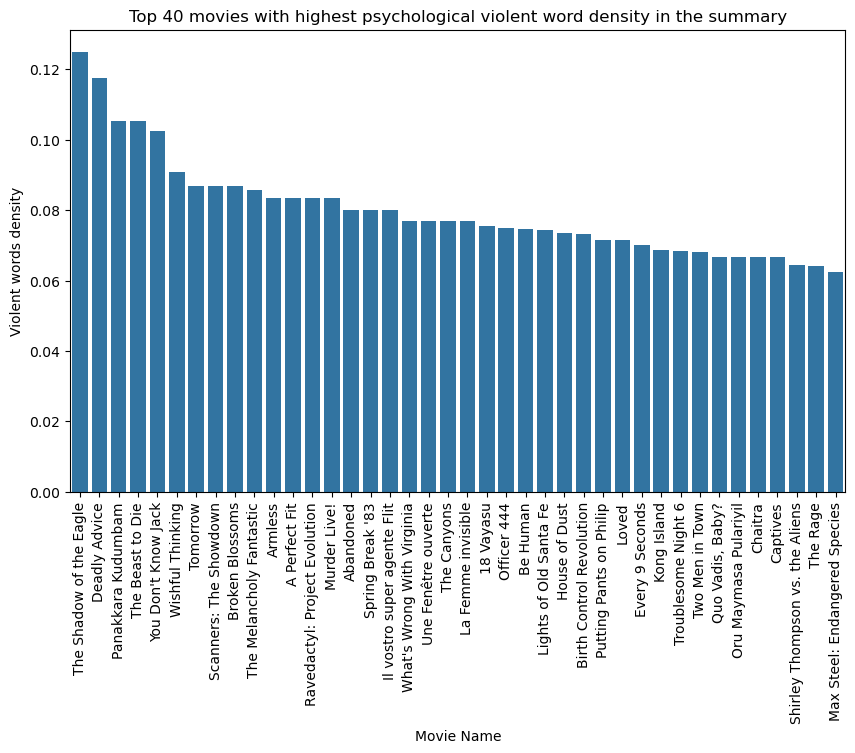

In [86]:
top_movies_density = CMU_movies_sorted_psycho_density.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies_density['movie_name'], y=top_movies_density['total_psycho_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest psychological violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

In [87]:
top_movies['movie_genres'].value_counts()


movie_genres
{"/m/02hmvc": "Short Film"}                                                                                                                                                                                                                                                                                                  2
{"/m/03npn": "Horror"}                                                                                                                                                                                                                                                                                                       2
{"/m/07s9rl0": "Drama", "/m/082gq": "War film"}                                                                                                                                                                                                                                                                              2
{"/m/02n4kr": "Mystery"}      

### A little bit of random investigation down here (to be deleted)

In [40]:
print(CMU_movies_sorted_psycho.loc[CMU_movies_sorted_psycho['movie_name'] == 'Perverse Hallucination'])

Empty DataFrame
Columns: [wikipedia_movie_ID, plot_summary, movie_name, movie_genres, total_psycho_vio_words, n_words_summary, total_psycho_vio_words_density]
Index: []


In [41]:
display(CMU_movies_sorted_psycho.loc[CMU_movies_sorted_psycho['movie_genres'] == 'Psychological thriller'])

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,total_psycho_vio_words,n_words_summary,total_psycho_vio_words_density
30628,33446745,kingsley's character is a man pushed to his li...,A Common Man,Psychological thriller,0,87,0.0
41842,36359227,18 vayasu is all about a mentally unstable you...,18 Vayasu,Psychological thriller,0,53,0.0
40681,31934171,"a ruthless rubber baron, mathukutty, disregard...",Irakal,Psychological thriller,0,42,0.0
7802,29425225,"at 1946, during the nuremberg trials, the czec...","I, Justice",Psychological thriller,0,159,0.0
266,16898363,daniel and laura are a young couple vacation...,Fata Morgana,Psychological thriller,0,332,0.0
3098,33832193,"a child suspected of having killed his father,...",Il diavolo nel cervello,Psychological thriller,0,27,0.0
16697,32126486,"a playwright, martine suffers from paranoia a...",The Letter,Psychological thriller,0,53,0.0
20345,29195939,"the film opens with the a woman, niamh , dragg...",The Lark,Psychological thriller,0,1021,0.0
20159,28104226,"samar , an eight-year-old motherless boy lives...",Nadunissi Naaygal,Psychological thriller,0,580,0.0
15082,19092476,"ziegenthals , a failed student, makes ends me...",One or the Other of Us,Psychological thriller,0,248,0.0


In [12]:
pattern_psycho = r'(?<!\w)(?:' + '|'.join(psycho_violence_list) + r')(?!\w)'


print(pattern_psycho)
display(CMU_plot_summary.loc[CMU_plot_summary['movie_name'] == '18 Vayasu']['plot_summary'])
display(CMU_plot_summary['plot_summary'][41842])


(?<!\w)(?:abandon|abandoned|abandoning|abuse|abused|abusing|abusive|agony|alienate|alienated|alienating|amnesia|animalistic|anxious|avoid|avoided|avoiding|belittle|belittled|belittling|blackmail|blackmailed|blackmailing|blame|blamed|blaming|brainwash|brainwashed|brainwashing|break|breaking|broken|bully|bullied|bullying|chaos|condition|conditional|control|controlled|controlling|criticism|criticize|criticized|criticizing|damaging|delude|deluded|deluding|delusion|delusional|deny|denial|denied|denying|destructive|dismiss|dismissal|dismissed|dismissing|disorder|embarrass|embarrassed|embarrassing|embarrassment|entitle|entitled|entitlement|exclude|excluded|excluding|exploitation|exploit|exploited|exploiting|extortion|fear|fearing|frighten|frightened|frightening|gaslight|gaslighted|gaslighting|guilty|hallucinate|hallucinated|hallucinating|hallucination|harass|harassed|harassing|harassment|hoover|hoovered|hoovering|humiliate|humiliated|humiliating|humiliation|hurt|hurting|hypercriticize|hypercr

41842    18 vayasu is all about a mentally unstable you...
Name: plot_summary, dtype: object

'18 vayasu is all about a mentally unstable youngster, who falls in love. be it happiness or anger, he has a unique way of expressing it. whenever he is depressed, he takes on the behaviour of an animal that he sights first.it released on august 24, 2012 and received negative reviews.[1][2] [3]18-vayasu-movie-trailer.{{cite web}}'

In [13]:
count = 0
for word in psycho_violence_list:
    count += CMU_plot_summary['plot_summary'][41842].count(word)

display(count)
display(CMU_plot_summary['plot_summary'][41842].count(pattern_psycho))

2

0

In [97]:
display(CMU_plot_summary.loc[CMU_plot_summary['movie_name'] == 'The Hunger Games']['plot_summary'])
display(CMU_plot_summary['plot_summary'][1])

print(CMU_plot_summary['plot_summary'][1].count(pattern_psycho))

1    the nation of panem consists of a wealthy capi...
Name: plot_summary, dtype: object

'the nation of panem consists of a wealthy capitol and twelve poorer districts. as punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual hunger games. the tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. in her first reaping, 12-year-old primrose everdeen is chosen from district 12. her older sister katniss volunteers to take her place. peeta mellark, a baker\'s son who once gave katniss bread when she was starving, is the other district 12 tribute. katniss and peeta are taken to the capitol, accompanied by their frequently drunk mentor, past victor haymitch abernathy. he warns them about the "career" tributes who train intensively at special academies and almost always win. during a tv interview with caesar flickerman, peeta unexpectedly reveals his love for katniss. she is outraged, believing it to be a ploy to gain audience support, as "sponsors" m

0
